### Blackjack Playground
Used to play with different Monte Carlo algortihms on the Blackjack OpenAI environment.

In [1]:
import gym
import sys
sys.path.append('/Users/bogdanfloris/Downloads/Code/Reinforcement-Learning/')
from library.monte_carlo import monte_carlo as mc
from library.plotting import plot_value_function_blackjack
from library.utils import create_state_value_function
%matplotlib inline

In [2]:
def blackjack_policy(observation):
    """
    Makes a Blackjack policy that sticks
    if the player score is >= 20and hits otherwise.
    :param observation: the state of the game
    """
    score, _, _ = observation
    return [1.0, 0.0] if score >= 20 else [0.0, 1.0]

In [3]:
env = gym.make('Blackjack-v0')

#### Monte Carlo Prediction

In [4]:
# 10000 episodes
episodes = 10000
state_values = mc.mc_prediction(env, no_episodes=episodes, policy=blackjack_policy)

100%|██████████| 10000/10000 [00:01<00:00, 7136.36it/s]


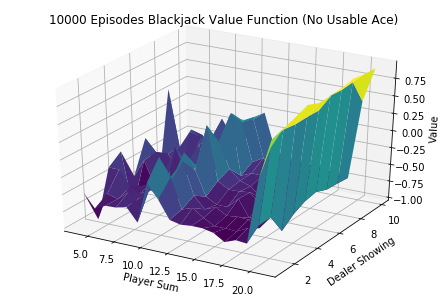

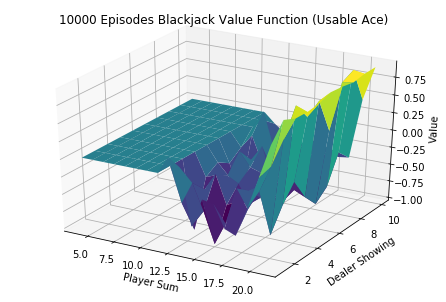

In [5]:
plot_value_function_blackjack(state_values, '{} Episodes Blackjack Value Function'.format(episodes))

In [6]:
# 500000 episodes
episodes = 500000
state_values = mc.mc_prediction(env, no_episodes=episodes, policy=blackjack_policy)

100%|██████████| 500000/500000 [01:10<00:00, 7104.88it/s]


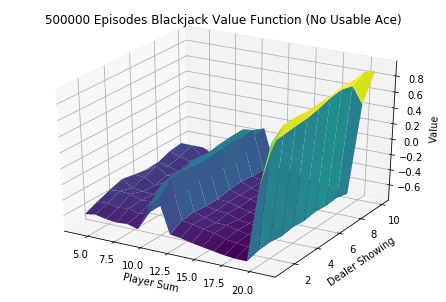

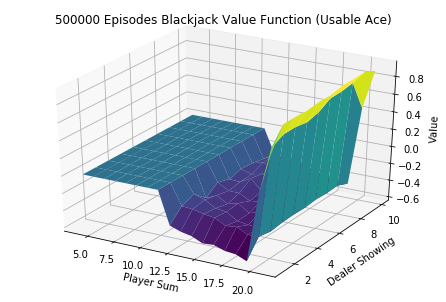

In [7]:
plot_value_function_blackjack(state_values, '{} Episodes Blackjack Value Function'.format(episodes))

#### On-policy MC Control with Epsilon Greedy Policy

In [8]:
q, _ = mc.mc_control_eps_greedy(env, no_episodes=500000)
state_values = create_state_value_function(q)

100%|██████████| 500000/500000 [01:42<00:00, 4880.74it/s]


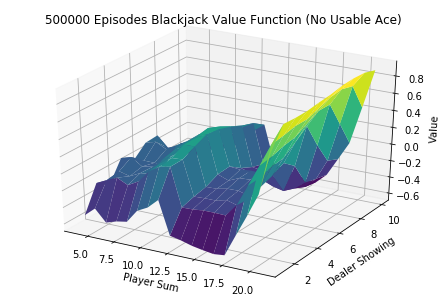

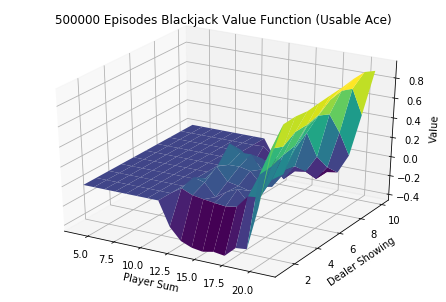

In [9]:
plot_value_function_blackjack(state_values, '{} Episodes Blackjack Value Function'.format(episodes))

#### Off-policy MC Control with Weighted Importance Sampling

In [10]:
random_policy = mc.make_random_policy(env.action_space.n)
q, _ = mc.mc_control_weighted_importance_sampling(env, no_episodes=500000, behavior_policy=random_policy)
state_values = create_state_value_function(q)

100%|██████████| 500000/500000 [01:02<00:00, 7981.28it/s]


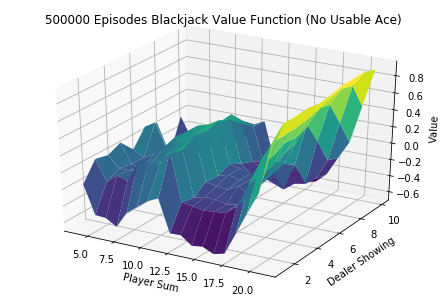

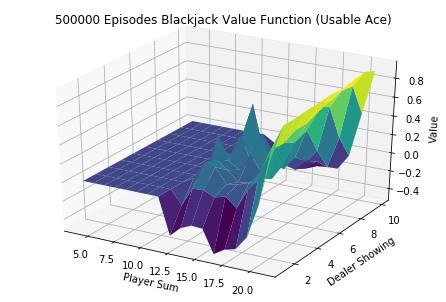

In [11]:
plot_value_function_blackjack(state_values, '{} Episodes Blackjack Value Function'.format(episodes))